## EDA on the Titanic dataset

### Step 1: Setup - Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better aesthetics
sns.set(style='whitegrid')

In [35]:
#!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

### Step 2: Data Loading

In [36]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
df.shape

(891, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


how to fill cabin value --> feature engineering

In [41]:
df.describe() # Descriptive statistical analysis

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [43]:
df['Age'] >= 18

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [44]:
df[df['Age'] >= 18] #series

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df[df['Embarked']=='C']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [46]:
df[(df['Sex'] == 'female') & (df['Embarked'] == 'Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [47]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

### Step 3: Data Cleaning

In [48]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
print("Missing values before cleaning:")
df.isnull().sum()

Missing values before cleaning:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
median = df['Age'].median()
print(median)

28.0


In [51]:
# 1. Handle missing 'Age' values
# We use the median to fill missing ages because the age distribution can be skewed.
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Verify that there are no more missing values in the columns we handled so far
print("Missing values after Age cleaning:")
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [52]:
mode = df['Embarked'].mode()[0]
print(mode)

S


In [53]:
# 2. Handle missing 'Embarked' values
# Since there are only two missing values, we'll fill them with the most common port of embarkation (the mode).
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# Verify that there are no more missing values in the columns we handled so far
print("Missing values after Embarked cleaning:")
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [55]:
# 3. Handle the 'Cabin' column
# With over 77% missing data, imputing is not a good idea. Instead, we'll create a new feature 'Has_Cabin'.
df['Has_Cabin'] = df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not
df.drop('Cabin', axis=1, inplace=True) # Drop the original column

In [56]:
df['Has_Cabin'].value_counts() 

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [57]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [58]:
# Verify that there are no more missing values in the columns we handled
print("Missing values after cleaning:")
df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

### Step 4: Univariate Analysis

Analyzing categorical features:


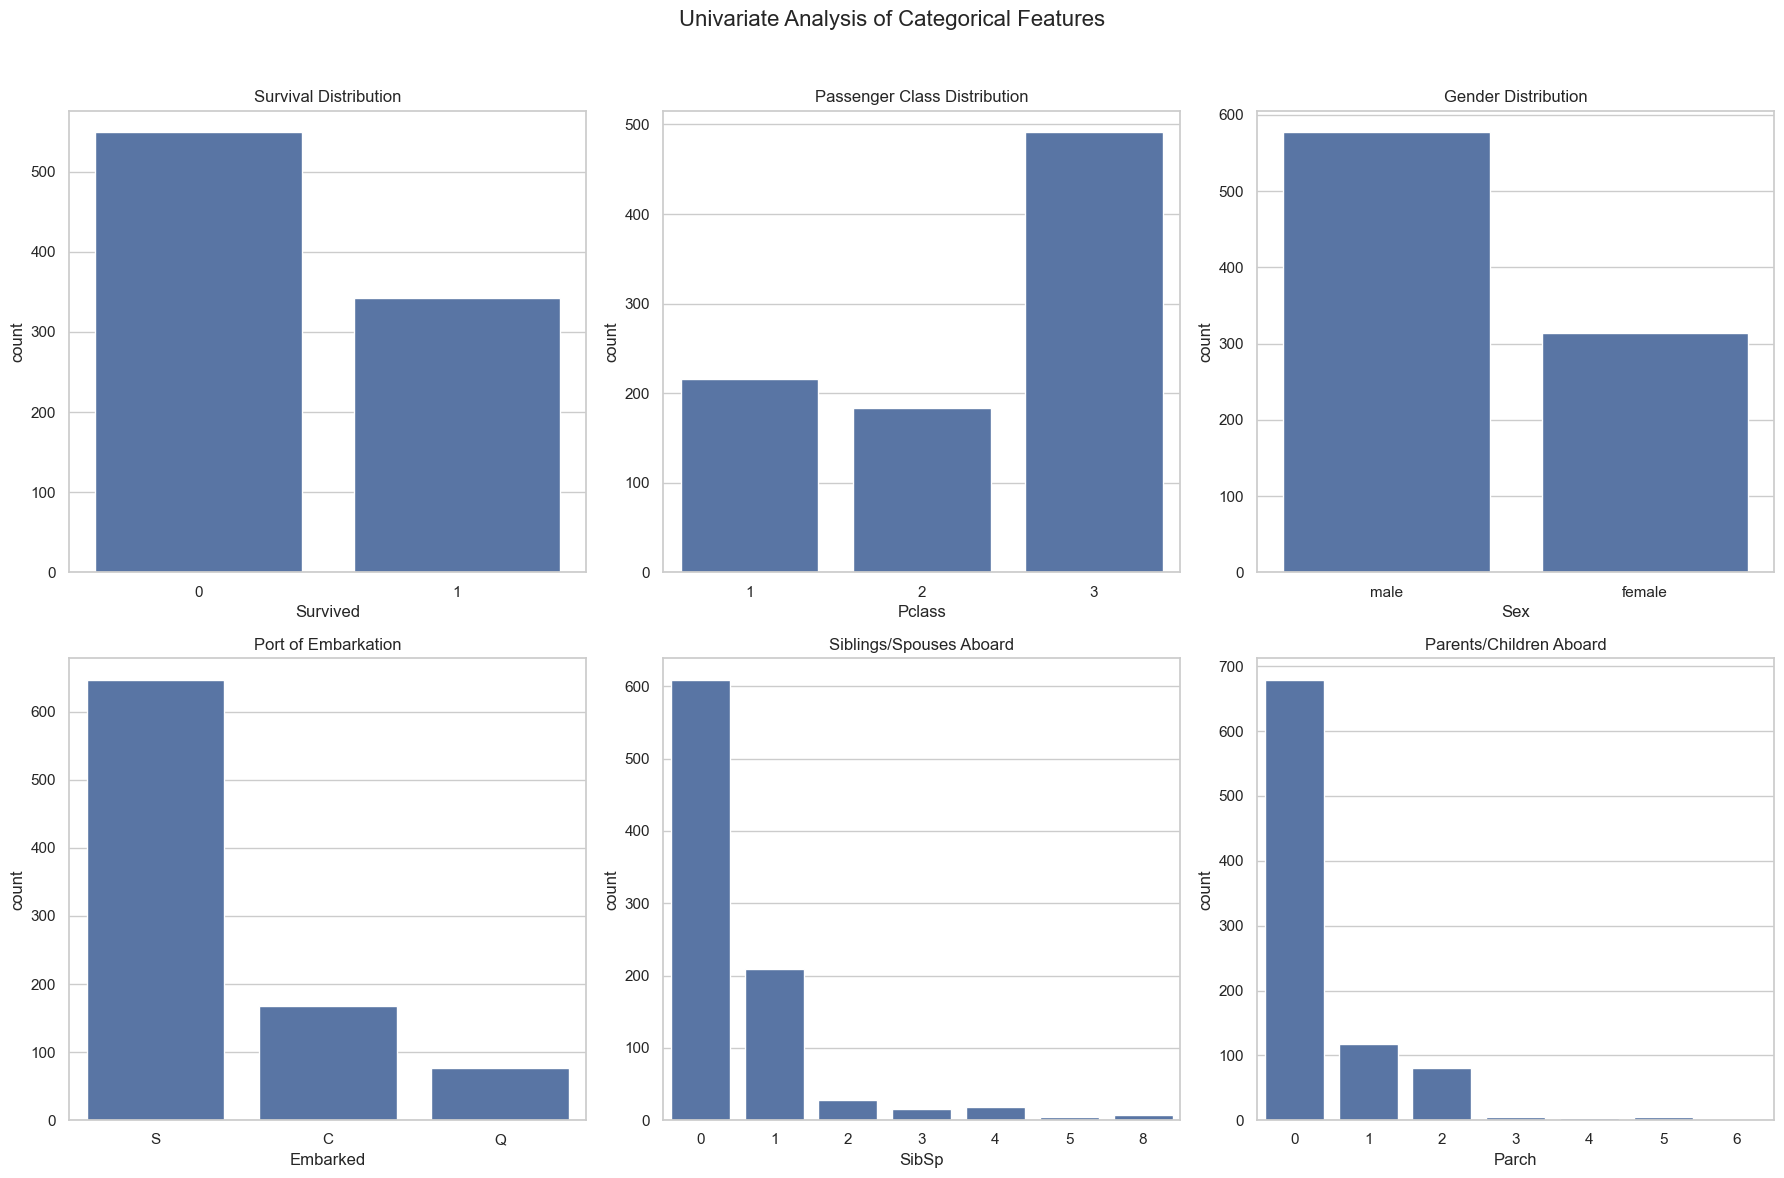

In [70]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.


Analyzing numerical features:


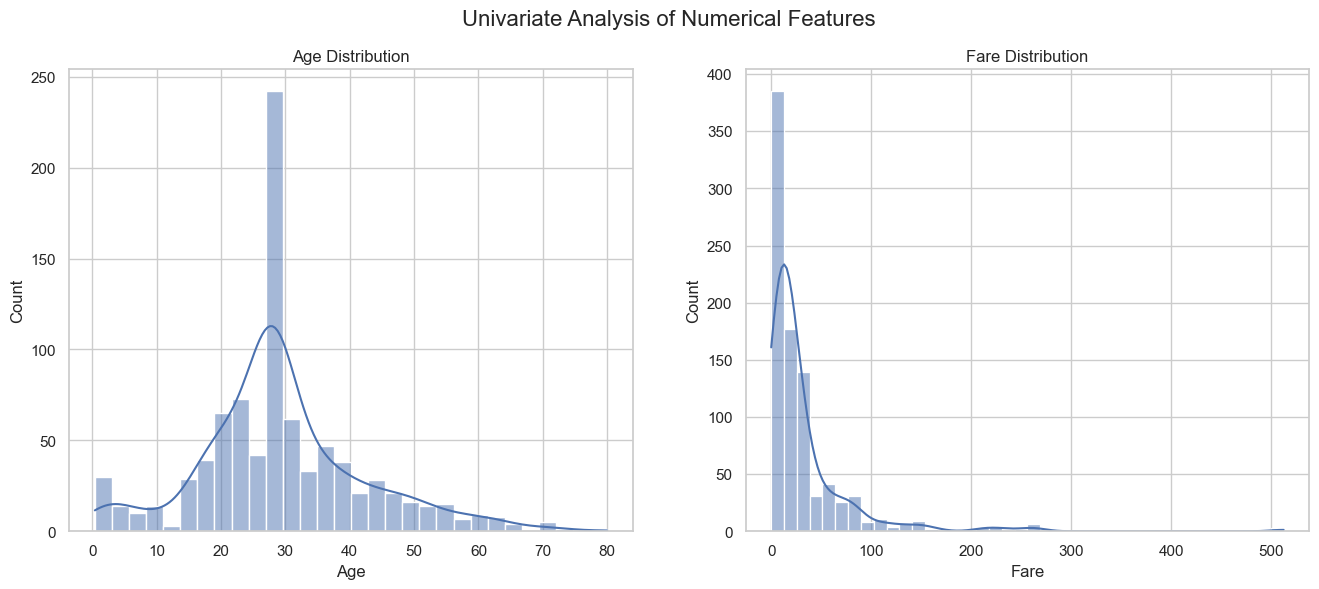

In [ ]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

### Step 5: Bivariate Analysis

Bivariate Analysis: Feature vs. Survival


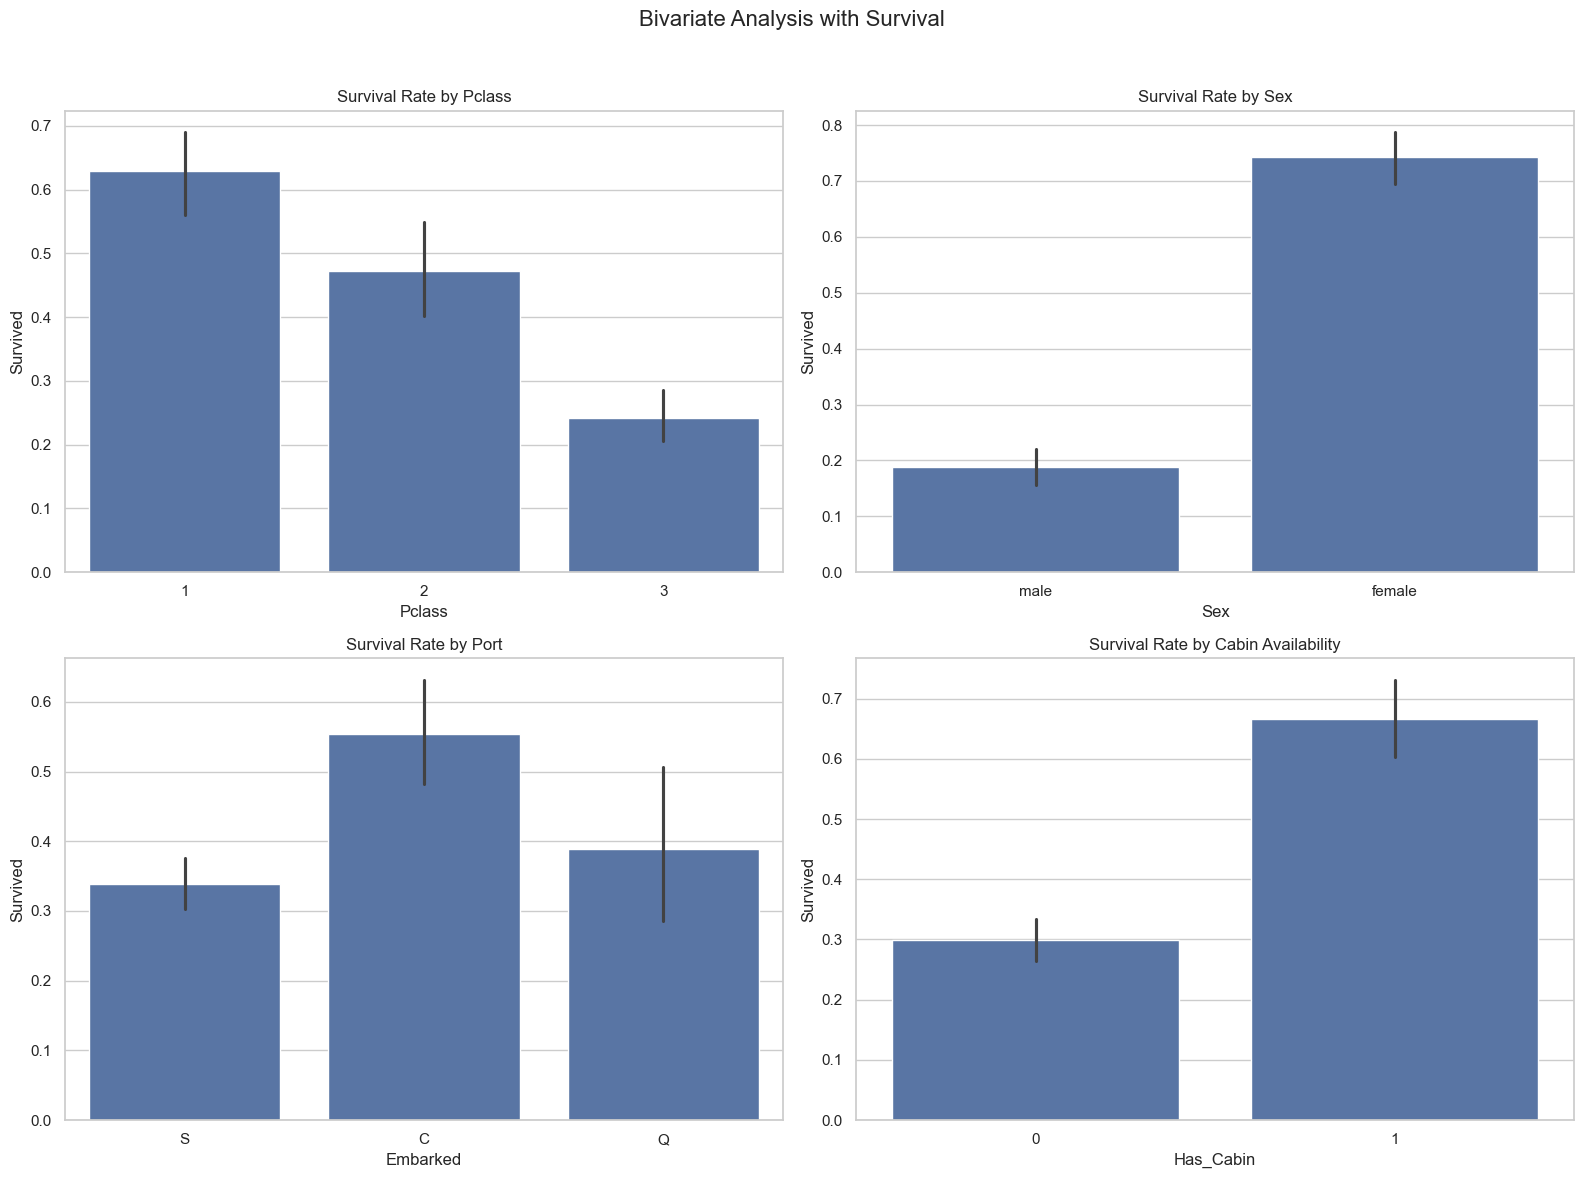

In [71]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

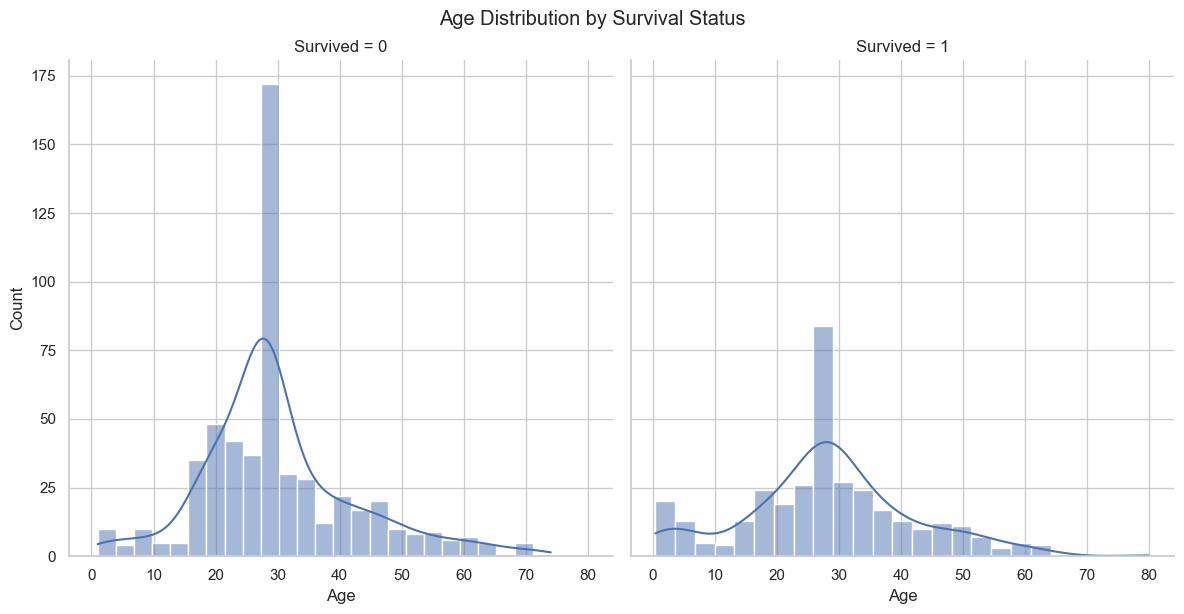

In [62]:
# Age vs. Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

#### Deeper Dive: Outlier Analysis for 'Fare'

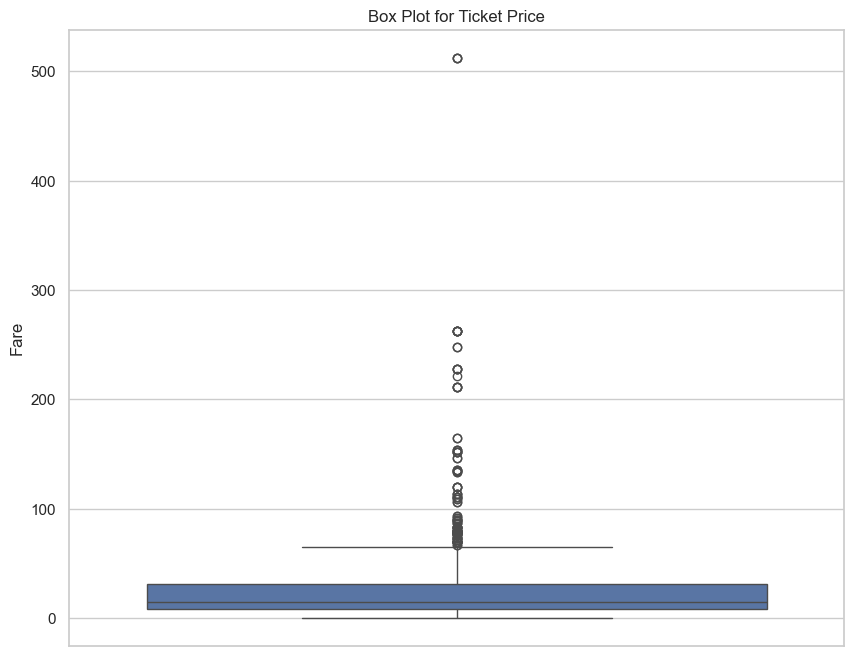

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare', data=df)
plt.title('Box Plot for Ticket Price')
plt.ylabel("Fare")
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

In [64]:
## Create a "familySIZE" column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


### Step 6: Feature Engineering

In [65]:
## Create a "familySIZE" column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


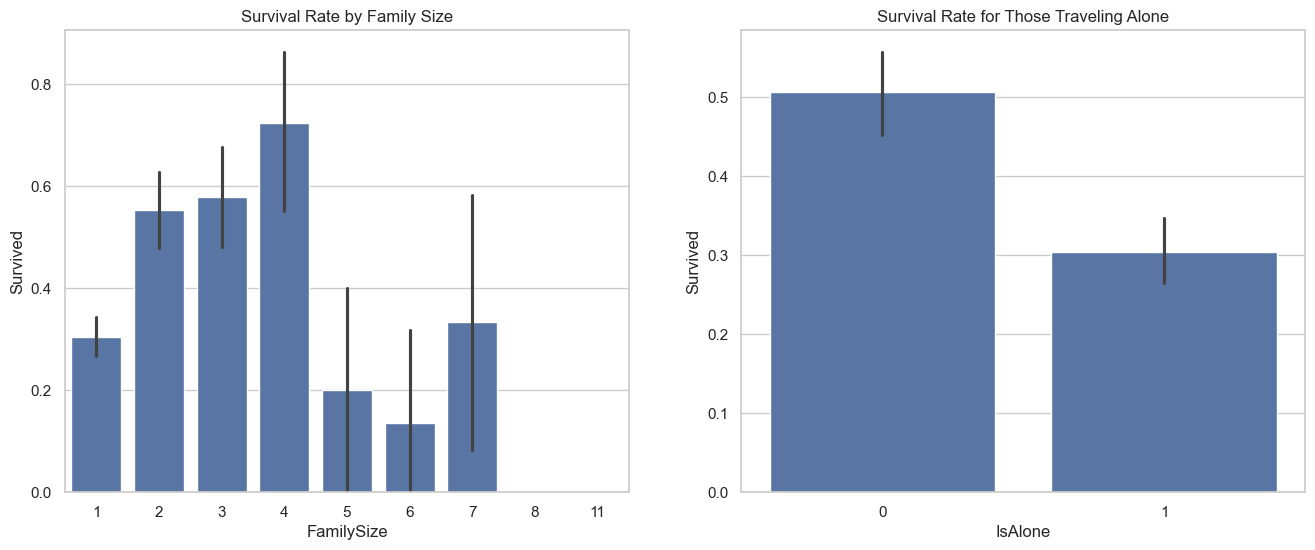

In [66]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [67]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

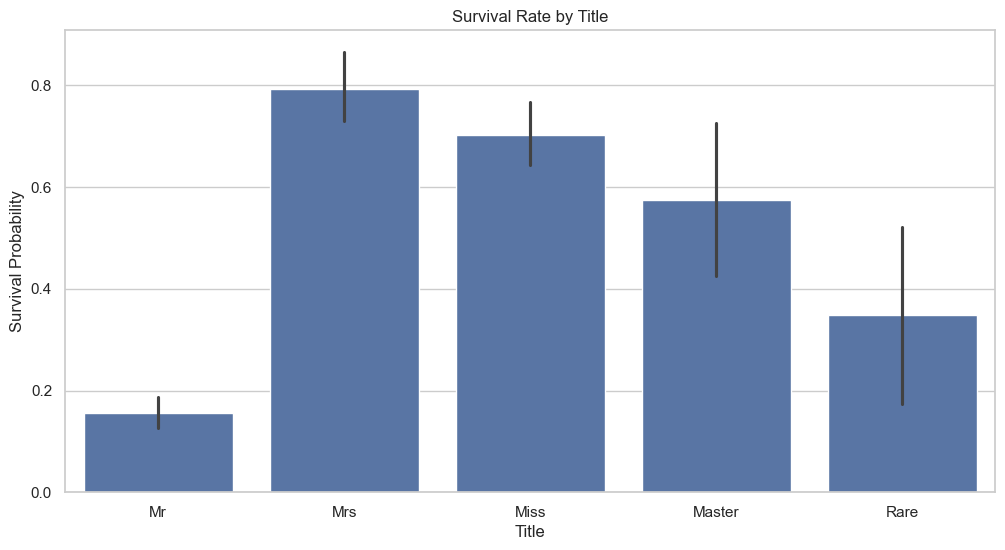

In [72]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

### Step 7: Multivariate Analysis

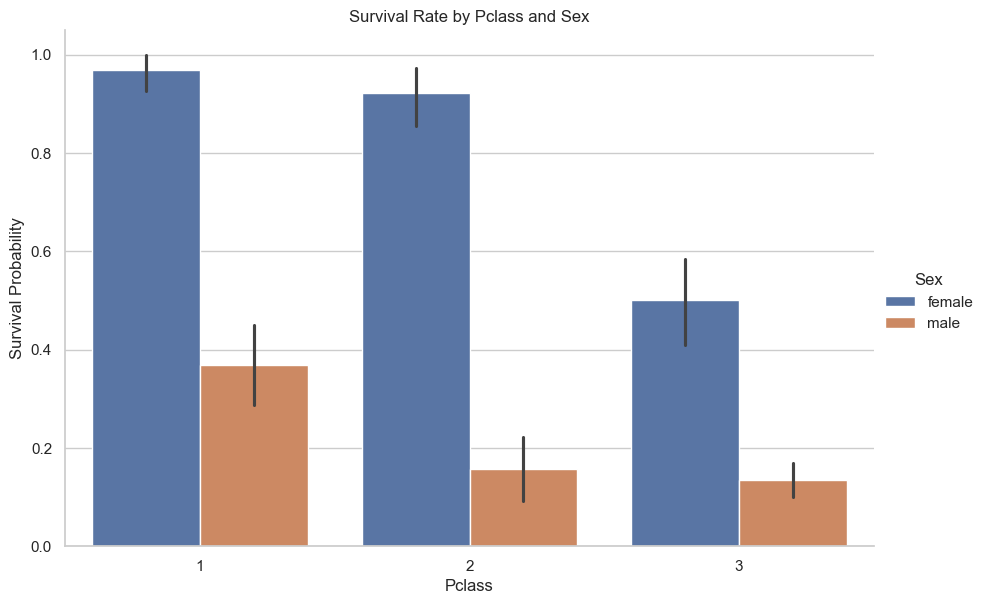

In [76]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

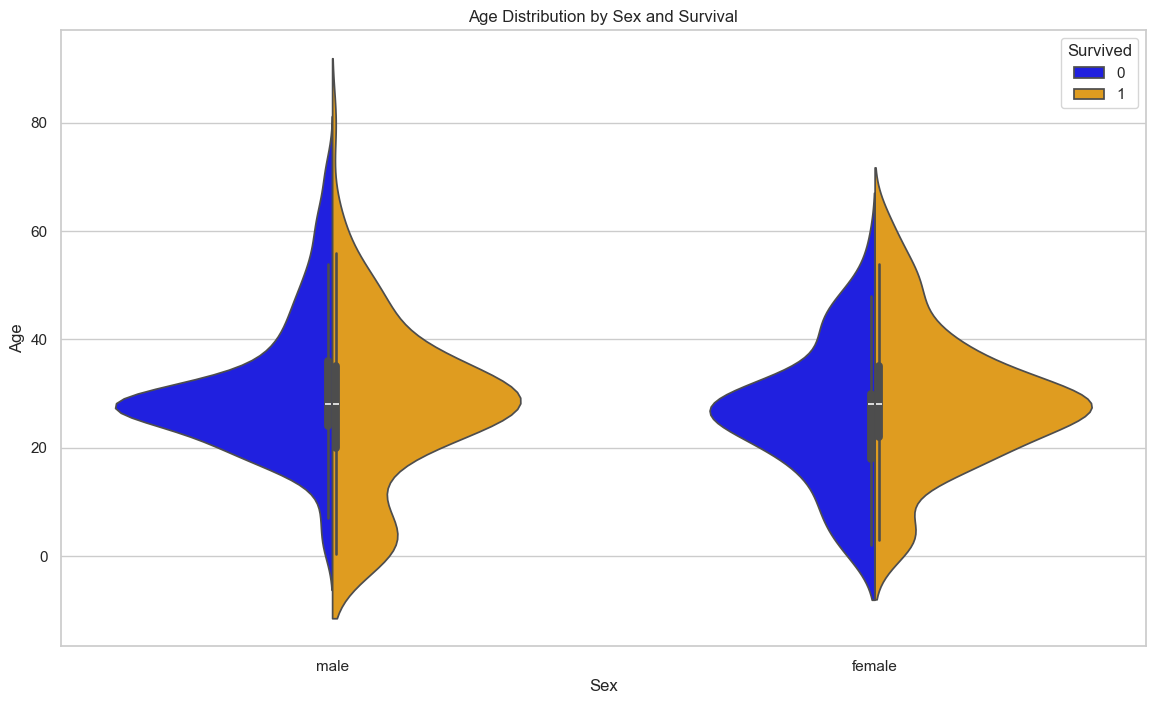

In [69]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

### Step 8: Correlation Analysis

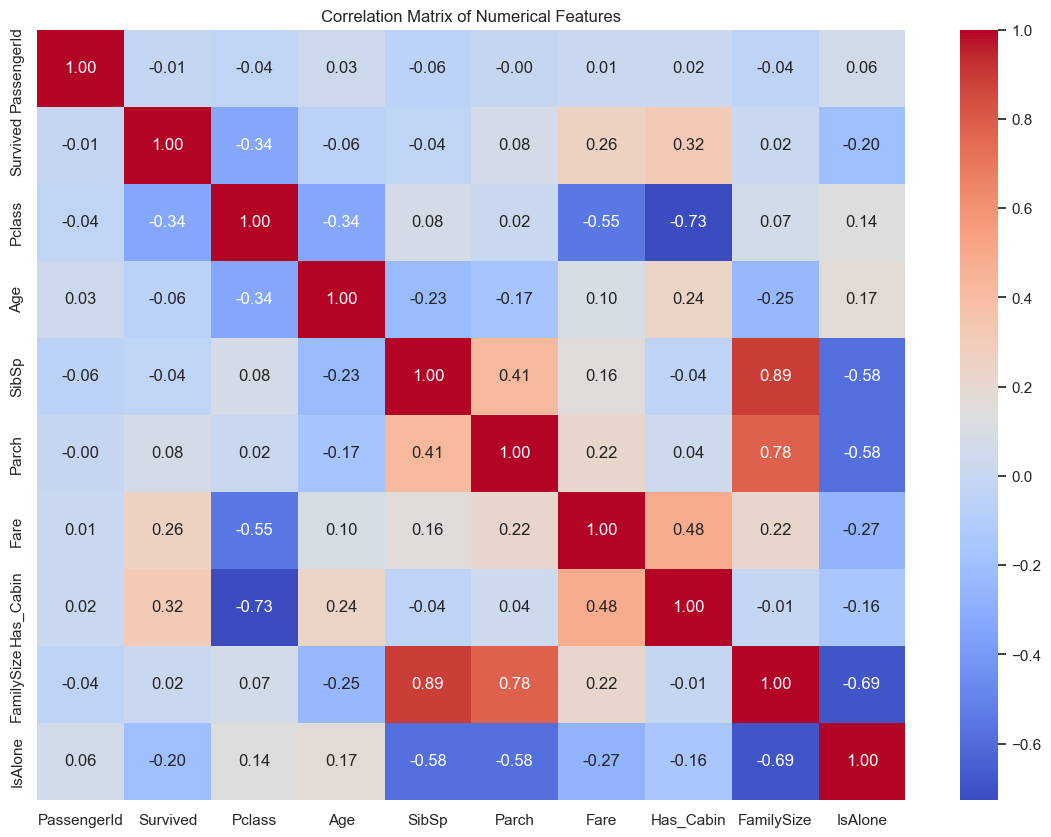

In [78]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.